In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mlxtend.frequent_patterns import apriori, association_rules

In [165]:
#%pip install mlxtend

In [166]:
df = pd.read_excel('Datasets/Market_Basket.xlsx')

In [167]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [168]:
df.isna().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [169]:
df.shape

(522064, 7)

In [170]:
df.dropna(subset=['Itemname'])

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [171]:
df.shape

(522064, 7)

In [172]:
df['Itemname'].nunique()

4185

In [173]:
df['Itemname'].value_counts().sort_values(ascending=False).head(20)

WHITE HANGING HEART T-LIGHT HOLDER    2269
JUMBO BAG RED RETROSPOT               2087
REGENCY CAKESTAND 3 TIER              1930
PARTY BUNTING                         1677
LUNCH BAG RED RETROSPOT               1570
ASSORTED COLOUR BIRD ORNAMENT         1465
SET OF 3 CAKE TINS PANTRY DESIGN      1360
PACK OF 72 RETROSPOT CAKE CASES       1328
LUNCH BAG  BLACK SKULL.               1315
NATURAL SLATE HEART CHALKBOARD        1246
JUMBO BAG PINK POLKADOT               1231
HEART OF WICKER SMALL                 1206
JUMBO STORAGE BAG SUKI                1191
PAPER CHAIN KIT 50'S CHRISTMAS        1183
JUMBO SHOPPER VINTAGE RED PAISLEY     1181
LUNCH BAG SPACEBOY DESIGN             1169
LUNCH BAG CARS BLUE                   1156
SPOTTY BUNTING                        1133
JAM MAKING SET PRINTED                1123
LUNCH BAG SUKI DESIGN                 1112
Name: Itemname, dtype: int64

In [174]:
df['BillNo'].nunique()

21663

In [175]:
df.groupby(['Country'])['Price'].sum()

Country
Australia                  3612.500
Austria                    1693.900
Bahrain                      82.760
Belgium                    7372.850
Brazil                      142.600
France                    36992.790
Germany                   33532.140
Greece                      663.290
Hong Kong                  6666.740
Iceland                     481.210
Israel                     1070.980
Italy                      3576.210
Japan                       657.210
Lebanon                     242.440
Lithuania                    99.440
Malta                       545.190
Netherlands                6247.730
Norway                     5662.470
Poland                     1377.210
Portugal                   8770.720
RSA                         248.100
Saudi Arabia                 21.160
Singapore                 12949.990
Spain                      9504.340
Sweden                     1695.790
Switzerland                6634.360
USA                         413.300
United Arab Emirates

In [176]:
df['Itemname'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2269
JUMBO BAG RED RETROSPOT                2087
REGENCY CAKESTAND 3 TIER               1930
PARTY BUNTING                          1677
LUNCH BAG RED RETROSPOT                1570
                                       ... 
FOOD COVER WITH BEADS , SET 2 SIZES       1
POLYESTER FILLER PAD 60x40cm              1
damages/credits from ASOS.                1
samples                                   1
PAPER CRAFT , LITTLE BIRDIE               1
Name: Itemname, Length: 4185, dtype: int64

In [177]:
df['Sales'] = df['Quantity'] * df['Price']

In [178]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Sales
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [179]:
df['Date'] = pd.to_datetime(df['Date'])

In [180]:
df['Year'] = df['Date'].dt.year

In [181]:
df.head(10)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Sales,Year
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
5,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010
7,536366,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010
8,536366,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010


# EDA

In [182]:
country_sales = pd.DataFrame(df.groupby(['Country'])['Sales'].sum())

In [183]:
country_sales.head()

,Sales
Country,
Australia,138521.31
Austria,10198.68
Bahrain,754.14
Belgium,41196.34
Brazil,1143.60


In [184]:
country_sales = country_sales.sort_values(by='Sales', ascending=False).reset_index()

In [185]:
country_sales.head(10)

,Country,Sales
0,United Kingdom,9003097.964
1,Netherlands,285446.340
2,Germany,228867.140
3,France,209715.110
4,Australia,138521.310
5,Spain,61577.110
6,Switzerland,57089.900
7,Belgium,41196.340
8,Sweden,38378.330
9,Japan,37416.370


In [186]:
country_sales_top10 = country_sales.head(10)

In [187]:
top_countries = country_sales_top10['Country'].values

In [188]:
top_countries

array(['United Kingdom', 'Netherlands', 'Germany', 'France', 'Australia',
       'Spain', 'Switzerland', 'Belgium', 'Sweden', 'Japan'], dtype=object)

<AxesSubplot:xlabel='Sales', ylabel='Country'>

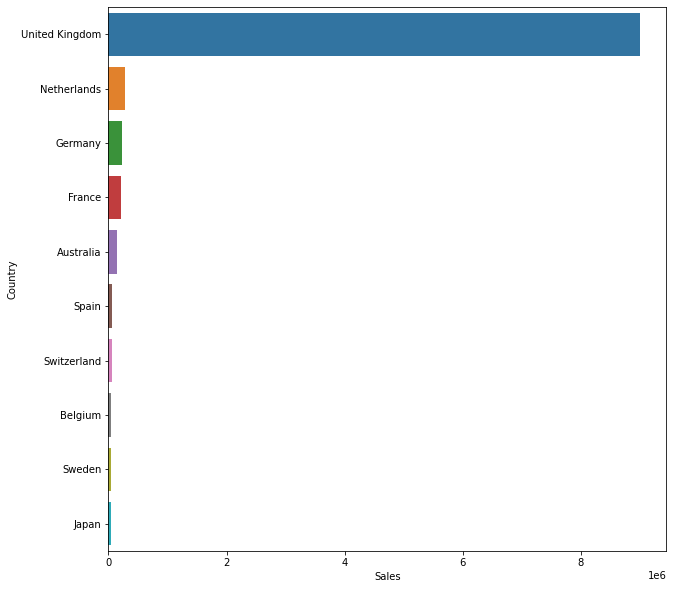

In [189]:
plt.figure(figsize=(10,10))
sns.barplot(y='Country', x='Sales', data=country_sales_top10, orient='h')

In [190]:
sales_per_year = pd.DataFrame(df.groupby(['Country','Year'])['Sales'].sum())

In [191]:
sales_per_year.head()

Sales
Country   Year           
Australia 2010    1032.85
          2011  137488.46
Austria   2010     277.20
          2011    9921.48
Bahrain   2010     205.74

In [229]:
sales_per_year = sales_per_year[sales_per_year['Country'].isin(top_countries)]

In [230]:
sales_per_year

,Country,Year,Sales
0,Australia,2010,1032.850
1,Australia,2011,137488.460
6,Belgium,2010,1809.910
7,Belgium,2011,39386.430
9,France,2010,9616.310
10,France,2011,200098.800
11,Germany,2010,15241.140
12,Germany,2011,213626.000
20,Japan,2010,7705.070
21,Japan,2011,29711.300


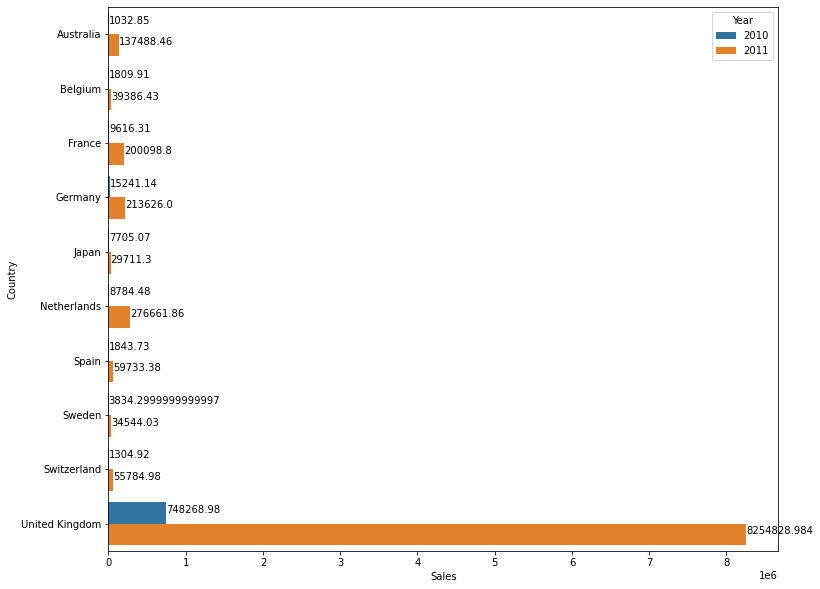

In [237]:
plt.figure(figsize=(12,10))
bar = sns.barplot(y='Country', x='Sales',hue='Year', data= sales_per_year, orient='h')

for p in bar.patches:
    width = p.get_width()
    # Add text to the axes
    bar.text(width + 10, p.get_y()+p.get_height()/2, width)

In [195]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Sales,Year
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010


# Continuing with the Apriori Algorithm

In [196]:
"""
%time pd.crosstab(df['BillNo'], df['Itemname'])
"""

"\n%time pd.crosstab(df['BillNo'], df['Itemname'])\n"

In [197]:
transactions = df.groupby(["BillNo","Itemname"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("BillNo")

In [198]:
transactions

Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A563185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
(transactions > 1).sum()

Itemname
*Boombox Ipod Classic             0
*USB Office Mirror Ball           0
10 COLOUR SPACEBOY PEN          264
12 COLOURED PARTY BALLOONS      139
12 DAISY PEGS IN WOOD BOX        42
                               ... 
wrongly marked carton 22804       0
wrongly marked. 23343 in box      0
wrongly sold (22719) barcode      1
wrongly sold as sets              0
wrongly sold sets                 0
Length: 4185, dtype: int64

In [200]:
#transactions[1 if x>=1 else 0 for x in transactions.values ]

In [201]:
#applymap: Apply a function to a Dataframe elementwise.
def remove_qty(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
transactions = transactions.applymap(remove_qty)

In [202]:
(transactions < 0).sum()

Itemname
*Boombox Ipod Classic           0
*USB Office Mirror Ball         0
10 COLOUR SPACEBOY PEN          0
12 COLOURED PARTY BALLOONS      0
12 DAISY PEGS IN WOOD BOX       0
                               ..
wrongly marked carton 22804     0
wrongly marked. 23343 in box    0
wrongly sold (22719) barcode    0
wrongly sold as sets            0
wrongly sold sets               0
Length: 4185, dtype: int64

In [203]:
(transactions > 1).sum()

Itemname
*Boombox Ipod Classic           0
*USB Office Mirror Ball         0
10 COLOUR SPACEBOY PEN          0
12 COLOURED PARTY BALLOONS      0
12 DAISY PEGS IN WOOD BOX       0
                               ..
wrongly marked carton 22804     0
wrongly marked. 23343 in box    0
wrongly sold (22719) barcode    0
wrongly sold as sets            0
wrongly sold sets               0
Length: 4185, dtype: int64

In [204]:
transactions.isna().sum()

Itemname
*Boombox Ipod Classic           0
*USB Office Mirror Ball         0
10 COLOUR SPACEBOY PEN          0
12 COLOURED PARTY BALLOONS      0
12 DAISY PEGS IN WOOD BOX       0
                               ..
wrongly marked carton 22804     0
wrongly marked. 23343 in box    0
wrongly sold (22719) barcode    0
wrongly sold as sets            0
wrongly sold sets               0
Length: 4185, dtype: int64

In [205]:
transactions.shape

(20208, 4185)

In [206]:
transactions.columns.name

'Itemname'

In [207]:
transactions.index.name

'BillNo'

In [208]:
transactions.columns.name = ''
transactions.index.name = ''
transactions.head()

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
itemset = apriori(transactions, min_support= 0.03, use_colnames=True)
itemset

,support,itemsets
0,0.046615,(6 RIBBONS RUSTIC CHARM)
1,0.039489,(60 TEATIME FAIRY CAKE CASES)
2,0.047852,(ALARM CLOCK BAKELIKE GREEN)
3,0.037559,(ALARM CLOCK BAKELIKE PINK)
4,0.050821,(ALARM CLOCK BAKELIKE RED)
...,...,...
120,0.036174,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC..."
121,0.040529,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS..."
122,0.033452,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ..."
123,0.035679,"(JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)"


In [210]:
rules = association_rules(itemset, metric='lift', min_threshold=1.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.047852,0.050821,0.031324,0.654602,12.880423,0.028892,2.748071
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.050821,0.047852,0.031324,0.616358,12.880423,0.028892,2.481867
2,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.050129,0.048248,0.036174,0.721619,14.956385,0.033755,3.418881
3,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.048248,0.050129,0.036174,0.749744,14.956385,0.033755,3.795592
4,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.059927,0.102138,0.040529,0.676301,6.621454,0.034408,2.773753
5,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.102138,0.059927,0.040529,0.396802,6.621454,0.034408,1.558483
6,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.057700,0.102138,0.033452,0.579760,5.676254,0.027559,2.136546
7,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.102138,0.057700,0.033452,0.327519,5.676254,0.027559,1.401230
8,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.102138,0.058294,0.035679,0.349322,5.992439,0.029725,1.447269
9,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.058294,0.102138,0.035679,0.612054,5.992439,0.029725,2.314402
